# Extracting Representations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import make_dataloader

/home/mboos/anaconda3/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /home/mboos/.config/matplotlib/stylelib/mb.mplstyle: Bad val "white" on line #20
	"grid.linewidth: white
"
	in file "/home/mboos/.config/matplotlib/stylelib/mb.mplstyle"
	Key grid.linewidth: Could not convert "white" to float
  styles = read_style_directory(stylelib_path)


## Data loading
Now we load some data as an example. Usually we would iterate through datagenerator (for training) or unload it into a large array (for dimensionality reduction).

In [22]:
datagenerator = make_dataloader(target_size=(224, 224))
images, labels = datagenerator.next()

Found 10920 images belonging to 136 classes.


Let's visualize one of these images.

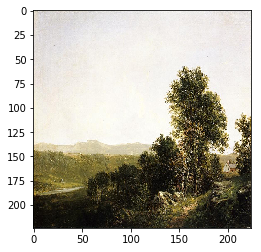

In [23]:
plt.imshow(images[30].astype('int'))

## Pretrained DNN representations
Now let's extract the representation for a pre-trained DNN.

In [31]:
def flatten_activation(activations):
    #TODO: this is stupid and very likely totally wrong -> should play around with layer
    '''Returns flattened activations for fully connected layers'''
    act_flat = np.concatenate([activations[layer] for layer in activations if layer.startswith('fc')], axis=1)
    return act_flat
    

from keras.applications import vgg16
from keract import get_activations
vgg_model = vgg16.VGG16(weights='imagenet')
processed_image = vgg16.preprocess_input(images[:10])
activations = get_activations(vgg_model, processed_image)
flat_activations = flatten_activation(activations)

Transfer learning detected. Model will be compiled with ("categorical_crossentropy", "adam").
If you want to change the default behaviour, then do in python:
model.name = ""
Then compile your model with whatever loss you want: https://keras.io/models/model/#compile.
If you want to get rid of this message, add this line before calling keract:
model.compile(loss="categorical_crossentropy", optimizer="adam")


## Dimensionality reduction

For now with PCA.

In [33]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
pc_representation = pca.fit_transform(flat_activations)

/home/mboos/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/mboos/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Some simple visualization

Text(0, 0.5, 'PC 2')

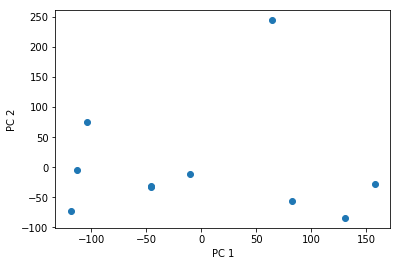

In [37]:
plt.scatter(pc_representation[:,0], pc_representation[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')